In [62]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Determine the daily return of AAPL and SPY from October 1st 2022 until October 1st 2023

In [63]:
symbols = ['AAPL', 'SPY']
start_date = "2022-10-01"
end_date = "2023-10-01"

data = yf.download(symbols, start=start_date, end=end_date, group_by='ticker')
closing_prices=data[[('AAPL','Adj Close'),('SPY','Adj Close')]]

returns = pd.DataFrame()
returns['AAPL'] = closing_prices['AAPL'].pct_change().dropna()
returns['SPY'] = closing_prices['SPY'].pct_change().dropna()
returns.head(10)

[*********************100%***********************]  2 of 2 completed


,AAPL,SPY
Date,,
2022-10-04,0.025623,0.030987
2022-10-05,0.002053,-0.002328
2022-10-06,-0.006626,-0.010316
2022-10-07,-0.036719,-0.027894
2022-10-10,0.002356,-0.007635
2022-10-11,-0.010255,-0.006333
2022-10-12,-0.004605,-0.003298
2022-10-13,0.033613,0.026391
2022-10-14,-0.032240,-0.022789


## Regress the return of AAPL on SPY

In [64]:
x = sm.add_constant(returns['SPY'])
y = returns['AAPL']
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     506.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           9.23e-62
Time:                        22:42:11   Log-Likelihood:                 796.19
No. Observations:                 249   AIC:                            -1588.
Df Residuals:                     247   BIC:                            -1581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -7.1e-05      0.001     -0.113      0.9

In [65]:
slope = model.params['SPY']
intercept = model.params['const']
mse = model.mse_resid

print("Slope:", round(slope,4))
print("Intercept:", round(intercept,4))
print("Mean Squared Error:", round(mse,4))

Slope: 1.3338
Intercept: -0.0001
Mean Squared Error: 0.0001


In [66]:
returns['Regression'] = intercept + slope * returns['SPY']
returns.head()

,AAPL,SPY,Regression
Date,,,
2022-10-04,0.025623,0.030987,0.041260
2022-10-05,0.002053,-0.002328,-0.003176
2022-10-06,-0.006626,-0.010316,-0.013831
2022-10-07,-0.036719,-0.027894,-0.037277
2022-10-10,0.002356,-0.007635,-0.010255


## Perform K-NN with k = 5 

In [67]:
X = returns['SPY'].values.reshape(-1, 1)
y = returns['AAPL'].values
 
k = 5
knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(X, y)
y_pred_knn = knn.predict(X)

In [68]:
mse_knn = mean_squared_error(y, y_pred_knn)
print("Mean Squared Error of k-NN Model (k=5):", round(mse_knn,4))

Mean Squared Error of k-NN Model (k=5): 0.0001


In [69]:
error_squared=np.square(y- y_pred_knn)
mse_knn = error_squared.mean()
print("Mean Squared Error of k-NN Model (k=5):", round(mse_knn,4))

Mean Squared Error of k-NN Model (k=5): 0.0001


In [70]:
returns['5-NN'] = y_pred_knn
returns.head()

,AAPL,SPY,Regression,5-NN
Date,,,,
2022-10-04,0.025623,0.030987,0.041260,0.032802
2022-10-05,0.002053,-0.002328,-0.003176,0.000790
2022-10-06,-0.006626,-0.010316,-0.013831,-0.012058
2022-10-07,-0.036719,-0.027894,-0.037277,-0.037262
2022-10-10,0.002356,-0.007635,-0.010255,-0.008374


## Perform K-NN with k = 10

In [71]:
X = returns['SPY'].values.reshape(-1, 1)
y = returns['AAPL'].values
 
k = 10
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X, y)
y_pred_knn = knn.predict(X)

In [72]:
mse_knn = mean_squared_error(y, y_pred_knn)
print("Mean Squared Error of k-NN Model (k=10):", round(mse_knn,4))

Mean Squared Error of k-NN Model (k=10): 0.0001


In [73]:
error_squared=np.square(y- y_pred_knn)
mse_knn = error_squared.mean()
print("Mean Squared Error of k-NN Model (k=10):", round(mse_knn,4))

Mean Squared Error of k-NN Model (k=10): 0.0001


In [74]:
returns['10-NN'] = y_pred_knn
returns.head()

,AAPL,SPY,Regression,5-NN,10-NN
Date,,,,,
2022-10-04,0.025623,0.030987,0.041260,0.032802,0.037090
2022-10-05,0.002053,-0.002328,-0.003176,0.000790,-0.001213
2022-10-06,-0.006626,-0.010316,-0.013831,-0.012058,-0.012343
2022-10-07,-0.036719,-0.027894,-0.037277,-0.037262,-0.025388
2022-10-10,0.002356,-0.007635,-0.010255,-0.008374,-0.004568


## Plot actual and forcasted daily return of AAPL from October 9th until October 13th

In [75]:
returns = returns.loc['2022-10-09':'2022-10-13']
returns

,AAPL,SPY,Regression,5-NN,10-NN
Date,,,,,
2022-10-10,0.002356,-0.007635,-0.010255,-0.008374,-0.004568
2022-10-11,-0.010255,-0.006333,-0.008518,-0.009536,-0.010899
2022-10-12,-0.004605,-0.003298,-0.004471,-0.006900,-0.008547
2022-10-13,0.033613,0.026391,0.035130,0.040428,0.037090


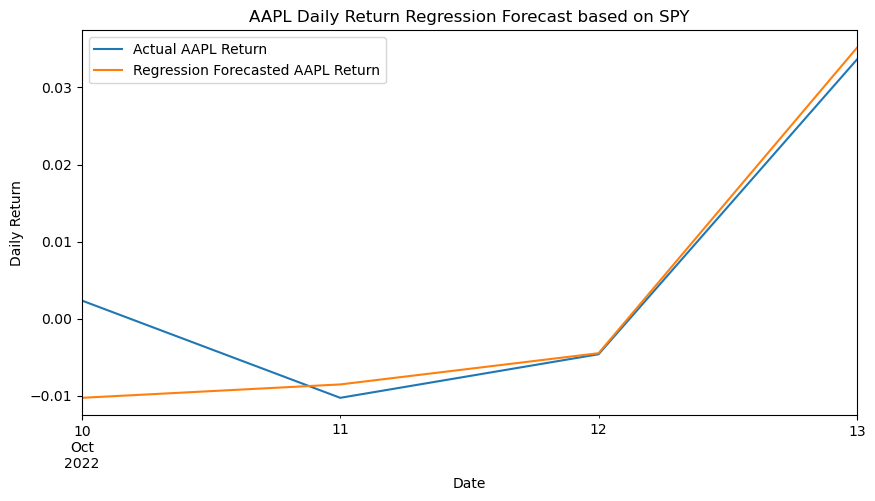

In [76]:
plt.figure(figsize=(10, 5))
returns['AAPL'].plot(label='Actual AAPL Return')
returns['Regression'].plot(label='Regression Forecasted AAPL Return')
plt.title('AAPL Daily Return Regression Forecast based on SPY')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()

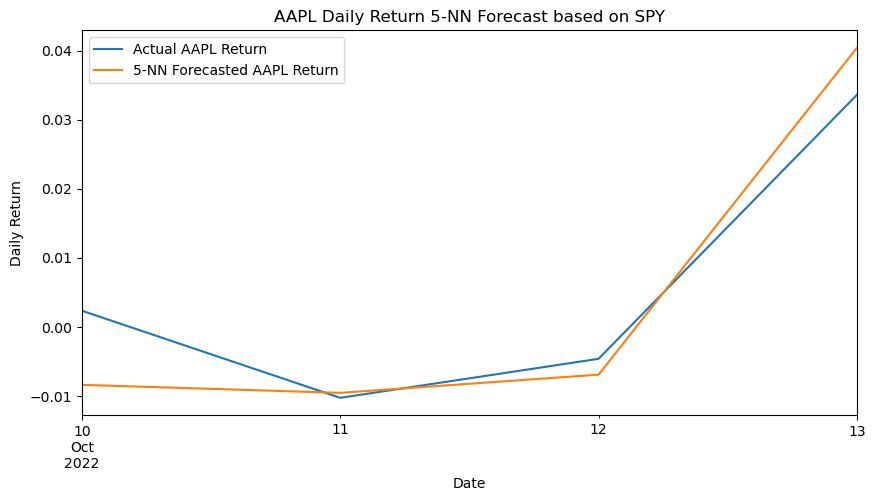

In [77]:
plt.figure(figsize=(10, 5))
returns['AAPL'].plot(label='Actual AAPL Return')
returns['5-NN'].plot(label='5-NN Forecasted AAPL Return')
plt.title('AAPL Daily Return 5-NN Forecast based on SPY')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()

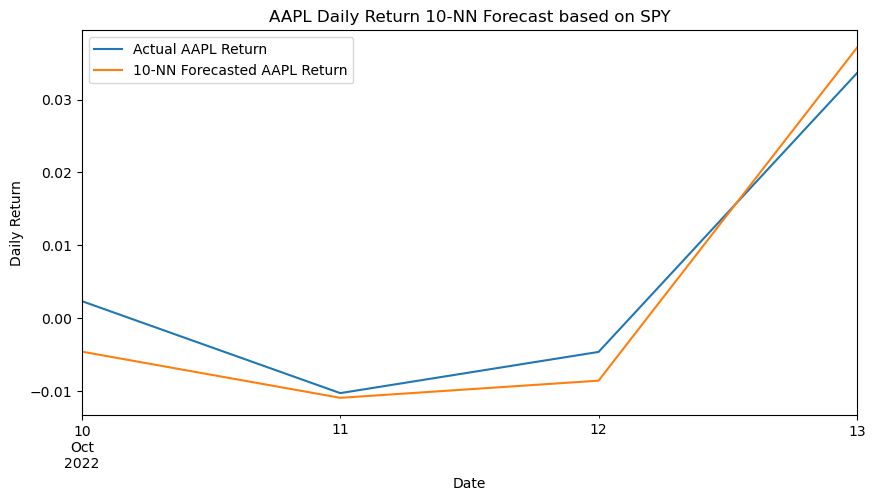

In [78]:
plt.figure(figsize=(10, 5))
returns['AAPL'].plot(label='Actual AAPL Return')
returns['10-NN'].plot(label='10-NN Forecasted AAPL Return')
plt.title('AAPL Daily Return 10-NN Forecast based on SPY')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()